<a href="https://colab.research.google.com/github/allanbraquiel/Data_Science_Projects/blob/master/Voos_ANAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Histórico de voos em todo o Brasil


O Voo Regular Ativo – VRA é uma base de dados composta por informações de voos de empresas de transporte aéreo regular que apresenta os cancelamentos e horários em que os voos ocorreram.

A ANAC torna pública a série histórica do Voo Regular Ativo para que sejam realizados estudos e análises. Abaixo está elencada a base de dados mensal do VRA, em formato “csv”. O mês é em referência às etapas cujas decolagens eram previstas para o mês em questão ou cujas decolagens, em caso de etapa não prevista, foram realizadas no mês em questão.

 https://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Biblioteca do Plotly para plotar os gráficos 
import cufflinks as cf
cf.go_offline()
import plotly
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [3]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

Os dados estão separado pelos anos de 2018, 2019 e 2020, dessa forma serão carregados separadamente, além dos dados com os nomes das empresas aereas e os nomes dos aeroportos

In [4]:
df_2018 = pd.read_excel("/content/drive/My Drive/Colab_Notebooks/Voos ANAC/2018/Unificado-2018.xlsx")
df_2019 = pd.read_excel("/content/drive/My Drive/Colab_Notebooks/Voos ANAC/2019/Unificado-2019.xlsx")
df_2020 = pd.read_excel("/content/drive/My Drive/Colab_Notebooks/Voos ANAC/2020/Unificado-2020.xlsx")
df_empresa_aerea = pd.read_excel("/content/drive/My Drive/Colab_Notebooks/Voos ANAC/glossario_de_empresas_aereas.xls")
df_aeroporto = pd.read_excel("/content/drive/My Drive/Colab_Notebooks/Voos ANAC/glossario_de_aerodromo.xls")

In [5]:
df_2018.columns

Index(['ICAO Empresa Aérea', 'Número Voo', 'Código Autorização (DI)',
       'Código Tipo Linha', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real',
       'Situação Voo', 'Código Justificativa'],
      dtype='object')

Cada dataset tem o nome das colunas diferentes então é preciso padronizar os nomes das colunas para que possam ser juntados.

In [6]:
df_2018.rename(columns={'ICAO Empresa Aérea': "Cod_Empresa_Aerea", 'Número Voo': 'Num_Voo', 'Código Autorização (DI)': 'Cod_Autorizacao_DI',
       'Código Tipo Linha': 'Cod_Tipo_Linha', 'ICAO Aeródromo Origem': "Cod_Aerodromo_Origem", 'ICAO Aeródromo Destino': 'Cod_Aerodromo_Destino',
       'Partida Prevista': 'Partida_Prevista', 'Partida Real': 'Partida_Real', 'Chegada Prevista': 'Chegada_Prevista', 'Chegada Real': 'Chegada_Real',
       'Situação Voo': 'Situacao_Voo', 'Código Justificativa': 'Cod_Justificativa'}, inplace=True)

In [7]:
df_2019.columns

Index(['ICAO Empresa Aérea', 'Número Voo', 'Código DI', 'Código Tipo Linha',
       'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Partida Prevista',
       'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situação Voo',
       'Código Justificativa'],
      dtype='object')

In [8]:
df_2019.rename(columns={'ICAO Empresa Aérea': "Cod_Empresa_Aerea", 'Número Voo': 'Num_Voo', 'Código DI': 'Cod_Autorizacao_DI', 'Código Tipo Linha': 'Cod_Tipo_Linha',
       'ICAO Aeródromo Origem': "Cod_Aerodromo_Origem", 'ICAO Aeródromo Destino': 'Cod_Aerodromo_Destino', 'Partida Prevista': 'Partida_Prevista',
       'Partida Real': 'Partida_Real', 'Chegada Prevista': 'Chegada_Prevista', 'Chegada Real': 'Chegada_Real', 'Situação Voo': 'Situacao_Voo',
       'Código Justificativa': 'Cod_Justificativa'}, inplace=True)

In [9]:
df_2020.columns

Index(['ICAO Empresa Aerea', 'Numero Voo', 'Codigo DI', 'Codigo Tipo Linha',
       'ICAO Aerodromo Origem', 'ICAO Aerodromo Destino', 'Partida Prevista',
       'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situacao Voo',
       'Codigo Justificativa'],
      dtype='object')

In [10]:
df_2020.rename(columns={'ICAO Empresa Aerea': 'Cod_Empresa_Aerea', 'Numero Voo': 'Num_Voo', 'Codigo DI': 'Cod_Autorizacao_DI', 'Codigo Tipo Linha': 'Cod_Tipo_Linha',
       'ICAO Aerodromo Origem':'Cod_Aerodromo_Origem', 'ICAO Aerodromo Destino': 'Cod_Aerodromo_Destino', 'Partida Prevista': 'Partida_Prevista',
       'Partida Real': 'Partida_Real', 'Chegada Prevista': 'Chegada_Prevista', 'Chegada Real': 'Chegada_Real', 'Situacao Voo': 'Situacao_Voo',
       'Codigo Justificativa': 'Cod_Justificativa'}, inplace=True)

Os nomes das colunas com o nome das empresas e dos nomes dos aereportos também serão modificados para uma melhor compreensão.

In [11]:
df_empresa_aerea.columns

Index(['Sigla OACI', 'Nome Empresas', 'Unnamed: 2', 'Nacional ou Estrangeira'], dtype='object')

In [12]:
df_empresa_aerea.rename(columns={'Sigla OACI': 'Cod_Empresa_Aerea', 'Nome Empresas': 'Nome_Empresa',	'Unnamed: 2': 'Unnamed', 'Nacional ou Estrangeira': 'Origem_Empresa'}, inplace=True)

In [13]:
df_aeroporto.columns

Index(['Sigla OACI', 'Descrição', 'Cidade', 'UF', 'País', 'Continente'], dtype='object')

In [14]:
df_aeroporto.rename(columns={'Sigla OACI': 'Sigla_Aeroporto', 'Descrição': 'Descricao','País': 'Pais'}, inplace=True)

Após modificar os nomes das colunas será necessário unificar os datasets de todos os anos em um só para que possa ser analisado durante todo o período

In [15]:
anos = [df_2018, df_2019, df_2020]
df_anos = pd.concat(anos)

In [16]:
df_anos.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Cod_Justificativa
0,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,NaN
1,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,NaN
2,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,NaN
3,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,NaN
4,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,NaN


Eliminando a coluna Cod_Justificativa que tem muitos valores nulos

In [19]:
df_anos.drop(columns=['Cod_Justificativa'], inplace=True)

In [20]:
df_anos.shape

(2448390, 11)

Agora é necessário unir o dataset principal com o de nomes das empresas aéreas (left join)

In [23]:
df_union = pd.merge(df_anos, df_empresa_aerea, on="Cod_Empresa_Aerea", how="left")

In [25]:
df_union.shape

(2448390, 14)

In [26]:
df_union.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Unnamed,Origem_Empresa
0,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA
1,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA
2,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA
3,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA
4,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA


In [27]:
df_union["Situacao_Voo"].value_counts()

REALIZADO        2364452
CANCELADO          81774
NÃO REALIZADO       1592
NíO INFORMADO        429
NAO INFORMADO         76
NÃO INFORMADO         42
NÕO INFORMADO         25
Name: Situacao_Voo, dtype: int64

Aqui vemos um problema onde existem erros de digitação e precisam ser corrigidos para que possam ter uma única informação

In [28]:
df_union.Situacao_Voo = df_union.Situacao_Voo.replace(["NíO INFORMADO", "NÕO INFORMADO", "NAO INFORMADO"], "NÃO INFORMADO")

In [29]:
df_union["Situacao_Voo"].value_counts()

REALIZADO        2364452
CANCELADO          81774
NÃO REALIZADO       1592
NÃO INFORMADO        572
Name: Situacao_Voo, dtype: int64

Criando uma nova coluna com a sigla do aeroporto de origem

In [30]:
df_union["Sigla_Aeroporto"] = df_union["Cod_Aerodromo_Origem"]

In [31]:
df_union.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Unnamed,Origem_Empresa,Sigla_Aeroporto
0,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA
1,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA
2,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA
3,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA
4,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA


Excluindo a coluna Unnamed

In [35]:
df_union.drop(columns=['Unnamed'], inplace=True)

Agora uma nova união será feita para inserir o nome dos aeroportos de origem e de destino

In [38]:
df_union.shape

(2448390, 14)

In [40]:
df_union2 = df_union.merge(df_aeroporto, how="left")

In [41]:
df_union2.shape

(2448390, 19)

In [42]:
df_union2.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Descricao,Cidade,UF,Pais,Continente
0,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
1,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
2,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
3,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
4,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE


In [43]:
df_copia = df_union2.copy()

In [ ]:
df_copia.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Cod_Justificativa,Nome_Empresa,Unnamed,Origem_Empresa,Sigla_Aeroporto,Descricao,Cidade,UF,Pais,Continente
0,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,NaN,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
1,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,NaN,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
2,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,NaN,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
3,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,NaN,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
4,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,NaN,AMERICAN AIRLINES INC,NaN,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE


In [44]:
# alterar descrição para aeroporto origem depois
df_copia.rename(columns={'Descricao': 'Aeroporto_Origem',	'Cidade': 'Cidade_Origem',	'UF': 'UF_Origem',	'Pais': 'Pais_Origem',	'Continente': 'Continente_Origem'}, inplace=True)

In [45]:
df_copia.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem
0,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
1,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
2,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
3,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE
4,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,KMIA,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE


Preencher a coluna Sigla_Aeroporto com o codigo do aeroporto de destino para fazer um novo merge e inserir o nome do aeroporto

In [48]:
df_copia['Sigla_Aeroporto'] = df_copia['Cod_Aerodromo_Destino']

In [49]:
df_copia.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest
0,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG
1,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG
2,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG
3,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG
4,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG


In [50]:
df_completo = df_copia.merge(df_aeroporto, how="left")

In [51]:
df_completo.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao,Cidade,UF,Pais,Continente
0,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL
1,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL
2,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL
3,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL
4,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL


In [101]:
df_completo.rename(columns={'Descricao': 'Aeroporto_Destino',	'Cidade': 'Cidade_Destino',	'UF': 'UF_Destino',	'Pais': 'Pais_Destino',	'Continente': 'Continente_Destino'}, inplace=True)

In [102]:
df_completo.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0
2018-01-02,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,2.0
2018-01-03,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,3.0
2018-01-04,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,4.0
2018-01-05,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,5.0


Transformando a coluna Partida_Prevista no tipo datetime e criando uma nova coluna com a Data

In [103]:
from datetime import datetime
df_completo["Data"] = df_completo['Partida_Prevista'].dt.strftime("%Y-%m-%d")

Criando novas colunas de ano, mês e dia

In [104]:
df_completo["Ano"] = df_completo["Partida_Prevista"].dt.year
df_completo["Mes"] = df_completo["Partida_Prevista"].dt.month
df_completo["Dia"] = df_completo["Partida_Prevista"].dt.day

In [105]:
df_completo.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia,Data
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0,2018-01-01
2018-01-02,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,2.0,2018-01-02
2018-01-03,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,3.0,2018-01-03
2018-01-04,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,4.0,2018-01-04
2018-01-05,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,5.0,2018-01-05


Verificando os dias que tem mais voos registrados

In [106]:
df_completo.Dia.value_counts()

5.0     82063
12.0    81844
6.0     81638
9.0     81571
10.0    81557
13.0    81511
19.0    81407
11.0    81399
14.0    81250
16.0    81168
17.0    80876
18.0    80820
15.0    80802
20.0    80461
8.0     80279
2.0     80225
4.0     80126
22.0    80107
21.0    79901
7.0     79875
3.0     79859
26.0    79740
23.0    79391
27.0    78768
28.0    78363
1.0     78271
25.0    77476
24.0    77321
29.0    72022
30.0    69407
31.0    43873
Name: Dia, dtype: int64

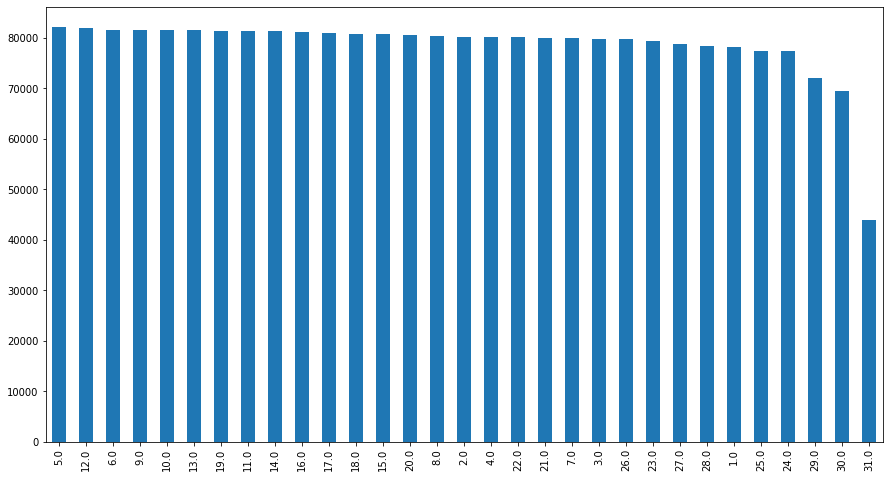

In [107]:
df_completo.Dia.value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



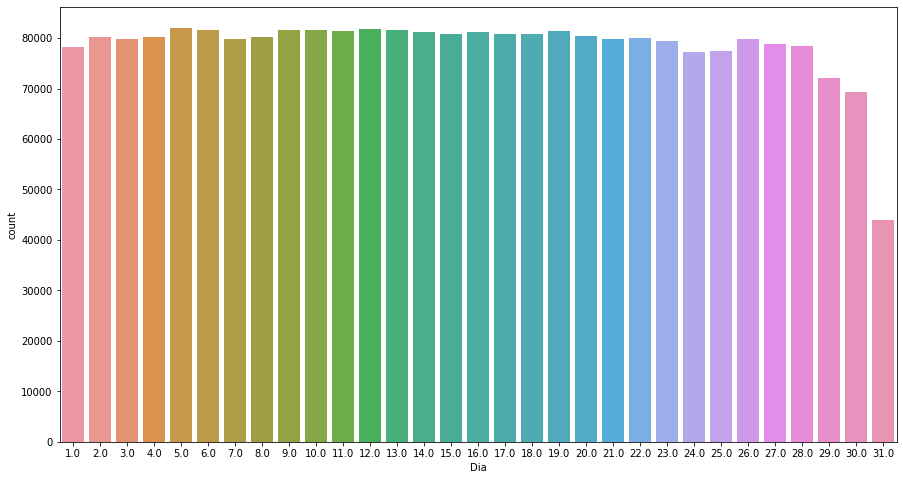

In [196]:
sns.countplot(df_completo.Dia)

In [108]:
df_completo.Mes.value_counts()

1.0     280981
2.0     244665
3.0     238338
10.0    208330
11.0    206431
7.0     195464
9.0     191859
8.0     189565
12.0    175876
5.0     169931
6.0     167101
4.0     164830
Name: Mes, dtype: int64

Verificando os meses com maior numero de voos

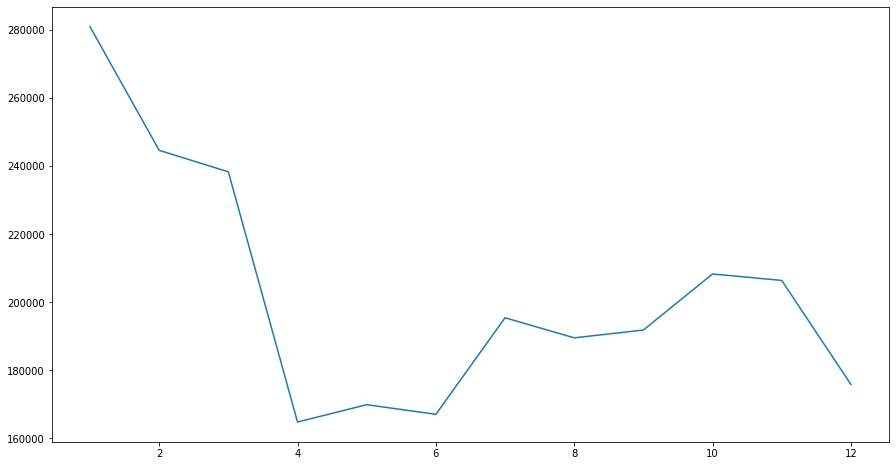

In [109]:
df_completo.Mes.value_counts().sort_index().plot.line()

Quantidade de voos por empresa

In [110]:
df_completo.groupby(["Nome_Empresa"])["Nome_Empresa"].count().sort_values(ascending=False).head(20)

Nome_Empresa
AZUL                                   718977
GOL                                    640237
TAM                                    591832
AVIANCA BRASIL                         126383
PASSAREDO                               36335
AEROLINEAS ARGENTINAS                   21421
COPA -COMPANIA PANAMENA DE AVIACION     20944
TAP AIR PORTUGAL                        18485
AMERICAN AIRLINES INC                   16096
ABSA                                    16061
LAN CHILE                               13216
MAP LINHAS AEREAS                       12910
TOTAL                                    9701
UNITED AIRLINES                          9664
QATAR AIRWAYS                            8122
LAN CARGO S.A                            7422
EMIRATES                                 7229
TAM TRANSP.AR.DEL.MERCOS.               7170
AVIANCA                                  6885
DELTA AIRLINES                           6840
Name: Nome_Empresa, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 144 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 144 missing from current font.



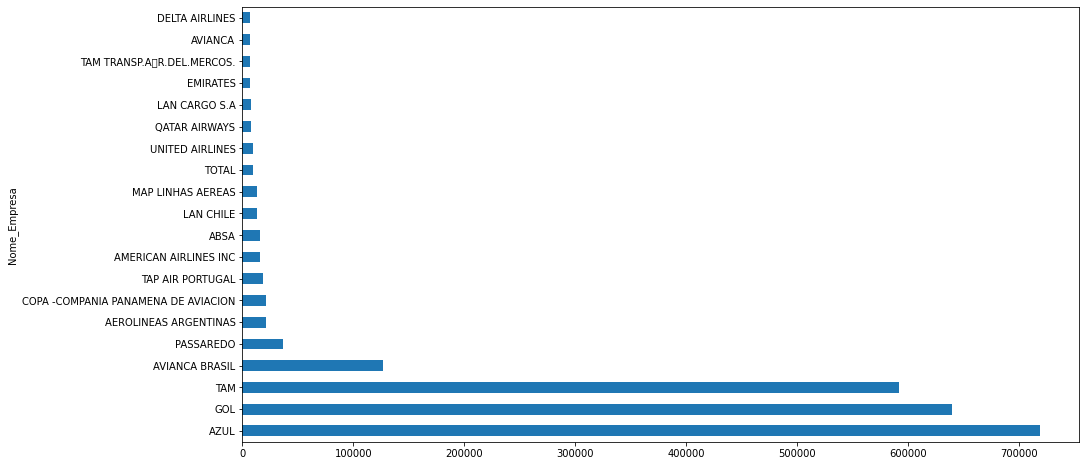

In [111]:
df_completo.groupby(["Nome_Empresa"])["Nome_Empresa"].count().sort_values(ascending=False).head(20).plot.barh()

In [112]:
voos_brasil = df_completo.query("Origem_Empresa == 'BRASILEIRA'")

In [113]:
voos_brasil.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia,Data
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,GLO,4939,0,R,SBSP,SBSV,2018-01-01 11:30:00,2018-01-01 11:50:00,2018-01-01 13:44:00,2018-01-01 14:06:00,REALIZADO,GOL,BRASILEIRA,SBSV,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES,SALVADOR,BA,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0,2018-01-01
NaT,GLO,4939,2,N,SBSP,SBSV,NaT,2018-01-01 11:50:00,NaT,2018-01-01 14:06:00,REALIZADO,GOL,BRASILEIRA,SBSV,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES,SALVADOR,BA,BRASIL,AMERICA DO SUL,NaN,NaN,NaN,NaN
2018-01-01,GLO,4870,0,R,SBGR,SBPV,2018-01-01 20:35:00,2018-01-01 20:35:00,2018-01-02 00:10:00,2018-01-02 00:20:00,REALIZADO,GOL,BRASILEIRA,SBPV,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,SBPV,GOVERNADOR JORGE TEIXEIRA DE OLIVEIRA,PORTO VELHO,RO,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0,2018-01-01
NaT,GLO,4870,2,N,SBGR,SBPV,NaT,2018-01-01 20:35:00,NaT,2018-01-02 00:20:00,REALIZADO,GOL,BRASILEIRA,SBPV,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,SBPV,GOVERNADOR JORGE TEIXEIRA DE OLIVEIRA,PORTO VELHO,RO,BRASIL,AMERICA DO SUL,NaN,NaN,NaN,NaN
2018-01-02,GLO,2070,0,R,SBSP,SBGO,2018-01-02 11:10:00,2018-01-02 11:17:00,2018-01-02 12:45:00,2018-01-02 12:57:00,REALIZADO,GOL,BRASILEIRA,SBGO,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,SBGO,SANTA GENOVEVA,GOIÂNIA,GO,BRASIL,AMERICA DO SUL,2018.0,1.0,2.0,2018-01-02


In [114]:
voos_brasil.groupby("Nome_Empresa")["Cod_Empresa_Aerea"].count().sort_values(ascending=False)

Nome_Empresa
AZUL                            718977
GOL                             640237
TAM                             591832
AVIANCA BRASIL                  126383
PASSAREDO                        36335
ABSA                             16061
MAP LINHAS AEREAS                12910
TOTAL                             9701
AMÉRICA DO SUL LINHAS AÉREAS      1029
Name: Cod_Empresa_Aerea, dtype: int64

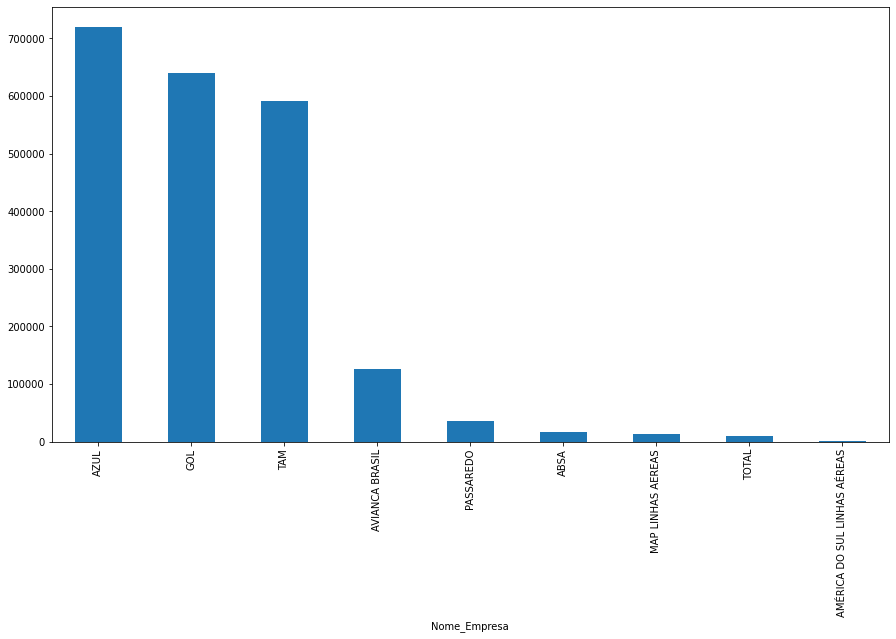

In [115]:
voos_brasil.groupby("Nome_Empresa")["Cod_Empresa_Aerea"].count().sort_values(ascending=False).plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

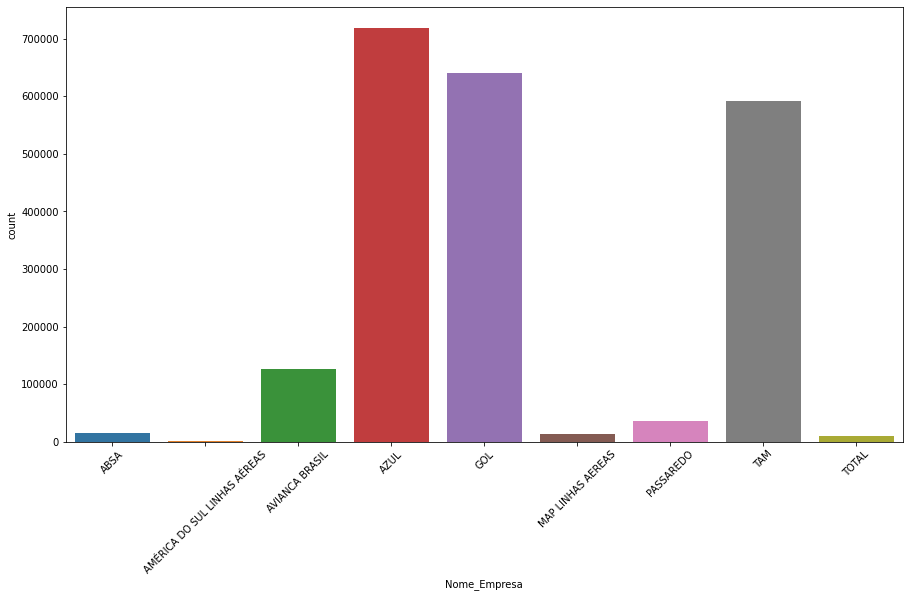

In [195]:
sns.countplot(voos_brasil.Nome_Empresa.sort_values())
plt.xticks(rotation=45)

In [116]:
voos_brasil.groupby(["Nome_Empresa","Situacao_Voo"])["Situacao_Voo"].count().sort_values(ascending=False)

Nome_Empresa                  Situacao_Voo 
AZUL                          REALIZADO        688885
GOL                           REALIZADO        624532
TAM                           REALIZADO        583981
AVIANCA BRASIL                REALIZADO        124001
PASSAREDO                     REALIZADO         33825
AZUL                          CANCELADO         29325
GOL                           CANCELADO         15385
ABSA                          REALIZADO         12183
MAP LINHAS AEREAS             REALIZADO         11370
TOTAL                         REALIZADO          9043
TAM                           CANCELADO          7695
ABSA                          CANCELADO          3806
PASSAREDO                     CANCELADO          2473
AVIANCA BRASIL                CANCELADO          2382
MAP LINHAS AEREAS             CANCELADO          1284
AZUL                          NÃO REALIZADO       767
AMÉRICA DO SUL LINHAS AÉREAS  REALIZADO           651
TOTAL                         CANCELAD

In [117]:
voos_brasil.query("Nome_Empresa == 'AZUL'")["Situacao_Voo"].value_counts(normalize=True)

REALIZADO        0.958146
CANCELADO        0.040787
NÃO REALIZADO    0.001067
Name: Situacao_Voo, dtype: float64

In [118]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2448390 entries, 2018-01-01 to 2020-11-24
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Cod_Empresa_Aerea      object        
 1   Num_Voo                object        
 2   Cod_Autorizacao_DI     object        
 3   Cod_Tipo_Linha         object        
 4   Cod_Aerodromo_Origem   object        
 5   Cod_Aerodromo_Destino  object        
 6   Partida_Prevista       datetime64[ns]
 7   Partida_Real           object        
 8   Chegada_Prevista       datetime64[ns]
 9   Chegada_Real           object        
 10  Situacao_Voo           object        
 11  Nome_Empresa           object        
 12  Origem_Empresa         object        
 13  Sigla_Aeroporto        object        
 14  Aeroporto_Origem       object        
 15  Cidade_Origem          object        
 16  UF_Origem              object        
 17  Pais_Origem            object        
 18  Contine

In [119]:
df_completo['Data'] = pd.to_datetime(df_completo['Data'], format="%Y/%m/%d")

In [120]:
df_completo = df_completo.set_index("Data")

In [121]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2448390 entries, 2018-01-01 to 2020-11-24
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Cod_Empresa_Aerea      object        
 1   Num_Voo                object        
 2   Cod_Autorizacao_DI     object        
 3   Cod_Tipo_Linha         object        
 4   Cod_Aerodromo_Origem   object        
 5   Cod_Aerodromo_Destino  object        
 6   Partida_Prevista       datetime64[ns]
 7   Partida_Real           object        
 8   Chegada_Prevista       datetime64[ns]
 9   Chegada_Real           object        
 10  Situacao_Voo           object        
 11  Nome_Empresa           object        
 12  Origem_Empresa         object        
 13  Sigla_Aeroporto        object        
 14  Aeroporto_Origem       object        
 15  Cidade_Origem          object        
 16  UF_Origem              object        
 17  Pais_Origem            object        
 18  Contine

In [122]:
df_completo.isnull().sum()

Cod_Empresa_Aerea             0
Num_Voo                     292
Cod_Autorizacao_DI          848
Cod_Tipo_Linha                0
Cod_Aerodromo_Origem          0
Cod_Aerodromo_Destino         0
Partida_Prevista          15019
Partida_Real              83915
Chegada_Prevista          15019
Chegada_Real              83915
Situacao_Voo                  0
Nome_Empresa              35743
Origem_Empresa            38940
Sigla_Aeroporto               0
Aeroporto_Origem          12979
Cidade_Origem             15808
UF_Origem                233100
Pais_Origem               12979
Continente_Origem         12979
Sigla_Aeroporto_Dest          0
Descricao_destino         12891
Cidade_Destino            15525
UF_Destino               233377
Pais_Destino              12891
Continente_Destino        12891
Ano                       15019
Mes                       15019
Dia                       15019
dtype: int64

In [123]:
df_completo.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0
2018-01-02,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,2.0
2018-01-03,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,3.0
2018-01-04,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,4.0
2018-01-05,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,5.0


Qauntidade de voos por empresa po ano

In [124]:
df_completo.groupby(["Ano", "Nome_Empresa"])["Nome_Empresa"].count().sort_values(ascending=False).head(20)

Ano     Nome_Empresa                       
2019.0  AZUL                                   302316
2018.0  AZUL                                   277918
2019.0  GOL                                    265582
2018.0  GOL                                    257986
2019.0  TAM                                    250403
2018.0  TAM                                    235362
2020.0  AZUL                                   133691
        GOL                                    113303
        TAM                                    103965
2018.0  AVIANCA BRASIL                          98448
2019.0  AVIANCA BRASIL                          27589
2018.0  PASSAREDO                               15121
2019.0  PASSAREDO                               13363
2018.0  COPA -COMPANIA PANAMENA DE AVIACION     10731
        AEROLINEAS ARGENTINAS                    9454
2019.0  AEROLINEAS ARGENTINAS                    8885
2018.0  AMERICAN AIRLINES INC                    8798
2019.0  COPA -COMPANIA PANAMENA DE AVI

In [125]:
df_agrupado_empresa_ano = df_completo.groupby(["Ano", "Nome_Empresa"])["Cod_Empresa_Aerea"].count().reset_index()

In [126]:
df_agrupado_empresa_ano.head()

,Ano,Nome_Empresa,Cod_Empresa_Aerea
0,2017.0,SURINAM AIRWAYS,1
1,2018.0,ABSA,6737
2,2018.0,AEROLINEAS ARGENTINAS,9454
3,2018.0,AEROMEXICO,1140
4,2018.0,AEROTRANSPORTES MAS DE CARGA S.A. DE C.V.,207


In [127]:
df_agrupado_empresa_ano["Qtde"] = df_agrupado_empresa_ano["Cod_Empresa_Aerea"]
df_agrupado_empresa_ano.drop("Cod_Empresa_Aerea", axis=1, inplace=True)
df_agrupado_empresa_ano.head(10)

,Ano,Nome_Empresa,Qtde
0,2017.0,SURINAM AIRWAYS,1
1,2018.0,ABSA,6737
2,2018.0,AEROLINEAS ARGENTINAS,9454
3,2018.0,AEROMEXICO,1140
4,2018.0,AEROTRANSPORTES MAS DE CARGA S.A. DE C.V.,207
5,2018.0,AIR CANADA,730
6,2018.0,AIR CHINA,418
7,2018.0,AIR EUROPA S/A,3576
8,2018.0,AIR FRANCE,2705
9,2018.0,AIRES AEROVIAS DE INTEGRACION,2


In [128]:
df_agrupado_empresa_ano.drop(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



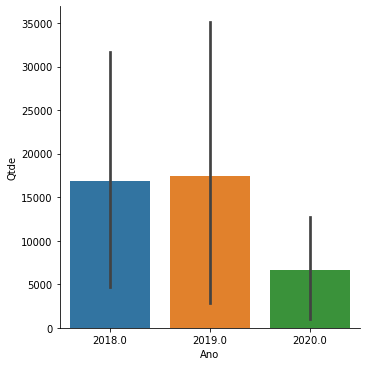

In [129]:
sns.factorplot(x='Ano', y='Qtde', data=df_agrupado_empresa_ano, kind='bar')

Qauntidade de voos por mes por ano e empresa

In [130]:
df_mes_empresa = df_completo.groupby(["Ano", "Mes", "Nome_Empresa"])["Ano", "Mes"].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [131]:
df_mes_empresa.head(20)

Ano    Mes
Ano    Mes  Nome_Empresa                                           
2017.0 10.0 SURINAM AIRWAYS                                1      1
2018.0 1.0  ABSA                                         768    768
            AEROLINEAS ARGENTINAS                       1298   1298
            AEROMEXICO                                    97     97
            AEROTRANSPORTES MAS DE CARGA S.A. DE C.V.     68     68
            AIR CANADA                                    62     62
            AIR CHINA                                     33     33
            AIR EUROPA S/A                               328    328
            AIR FRANCE                                   292    292
            ALITALIA                                     256    256
            AMERICAN AIRLINES INC                       1164   1164
            ATLAS AIR INC                                 93     93
            AUSTRAL LÖNEAS AREAS CIELOS DEL SUR S.A      84     84
            AVIANCA                                      372    372
            AVIANCA BRASIL                              8450   8450
            AVIOR AIRLINES CA                             27     27
            AZUL                                       27559  27559
            BOLIVIANA DE AVIACION                        141    141
            BRITISH AIRWAYS PLC                          178    178
            CARGOLUX AIRLINES                            125    125

In [132]:
df_mes_empresa.drop("Mes", axis=1, inplace=True)

In [133]:
df_mes_empresa.rename(columns={"Ano": "Qtde"}, inplace=True)
df_mes_empresa.head()

Qtde
Ano    Mes  Nome_Empresa                                   
2017.0 10.0 SURINAM AIRWAYS                               1
2018.0 1.0  ABSA                                        768
            AEROLINEAS ARGENTINAS                      1298
            AEROMEXICO                                   97
            AEROTRANSPORTES MAS DE CARGA S.A. DE C.V.    68

In [134]:
df_mes_empresa = df_mes_empresa.reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



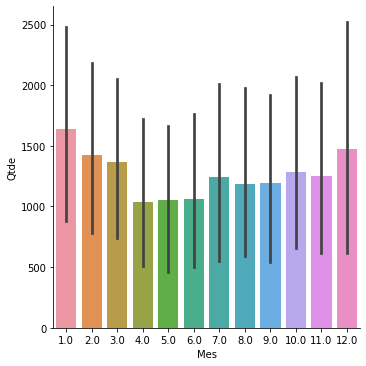

In [135]:
sns.factorplot(x='Mes', y='Qtde', data=df_mes_empresa, kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



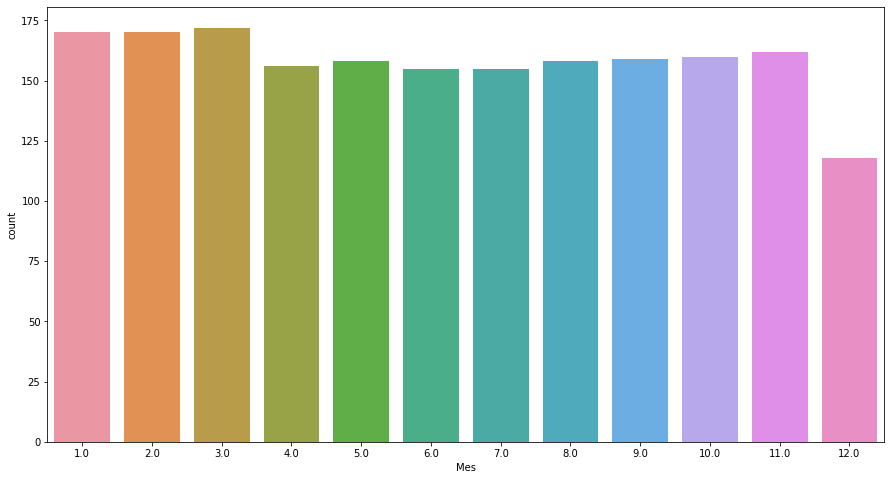

In [186]:
sns.countplot(df_mes_empresa.Mes)

Aeroportos com maior número de partidas

In [136]:
df_completo.Cidade_Origem.value_counts().head(20).iplot(kind="barh")

Areoportos com maior número de chegada

In [137]:
df_completo.Cidade_Destino.value_counts().head(20).iplot(kind="bar")

Voos mais frequentes

In [138]:
df_completo[['Cidade_Origem', 'Cidade_Destino']].head()

,Cidade_Origem,Cidade_Destino
Data,,
2018-01-01,MIAMI,MANAUS
2018-01-02,MIAMI,MANAUS
2018-01-03,MIAMI,MANAUS
2018-01-04,MIAMI,MANAUS
2018-01-05,MIAMI,MANAUS


Criando uma nova coluna com a origem e destino do voo

In [139]:
df_completo["Itinerario"] = df_completo["Cidade_Origem"] + "-" + df_completo["Cidade_Destino"]

In [140]:
df_completo.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia,Itinerario
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0,MIAMI-MANAUS
2018-01-02,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,2.0,MIAMI-MANAUS
2018-01-03,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,3.0,MIAMI-MANAUS
2018-01-04,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,4.0,MIAMI-MANAUS
2018-01-05,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,5.0,MIAMI-MANAUS


In [141]:
df_completo.Itinerario.value_counts().head(20)

RIO DE JANEIRO-SÃO PAULO    53781
SÃO PAULO-RIO DE JANEIRO    53744
GUARULHOS-RIO DE JANEIRO    21708
RIO DE JANEIRO-GUARULHOS    21482
GUARULHOS-PORTO ALEGRE      21205
PORTO ALEGRE-GUARULHOS      21174
BRASÍLIA-RIO DE JANEIRO     19236
RIO DE JANEIRO-BRASÍLIA     19132
BRASÍLIA-SÃO PAULO          18924
SÃO PAULO-BRASÍLIA          18884
CONFINS-SÃO PAULO           18347
SÃO PAULO-CONFINS           18145
PORTO ALEGRE-SÃO PAULO      16127
SALVADOR-GUARULHOS          16118
CONFINS-GUARULHOS           16117
SÃO PAULO-PORTO ALEGRE      16101
GUARULHOS-CONFINS           16098
GUARULHOS-SALVADOR          16000
GUARULHOS-RECIFE            15872
RECIFE-GUARULHOS            15860
Name: Itinerario, dtype: int64

In [142]:
df_completo.groupby(["Ano", "Itinerario"])["Mes"].count().sort_values(ascending=False).head(10).reset_index()

,Ano,Itinerario,Mes
0,2018.0,RIO DE JANEIRO-SÃO PAULO,23536
1,2018.0,SÃO PAULO-RIO DE JANEIRO,23485
2,2019.0,RIO DE JANEIRO-SÃO PAULO,22524
3,2019.0,SÃO PAULO-RIO DE JANEIRO,22520
4,2018.0,GUARULHOS-RIO DE JANEIRO,9021
5,2018.0,RIO DE JANEIRO-GUARULHOS,8967
6,2018.0,PORTO ALEGRE-GUARULHOS,8608
7,2018.0,GUARULHOS-PORTO ALEGRE,8592
8,2019.0,PORTO ALEGRE-GUARULHOS,8513
9,2019.0,GUARULHOS-PORTO ALEGRE,8488


In [143]:
df_completo.Itinerario.value_counts().tail(20)

FLORIANÓPOLIS-VITÓRIA                         1
MONTES CLAROS-TEIXEIRA DE FREITAS             1
GUARULHOS-ALTAMIRA                            1
JUNDIAÍ-MANGARATIBA                           1
ACCRA/KOTOKA INTL-RIO DE JANEIRO              1
CUZCO-SANTIAGO DO CHILE                       1
GOIÂNIA-UBERABA                               1
JACKSONVILLE/INTL.FL.-RIO DE JANEIRO          1
VÁRZEA GRANDE-PETROLINA                       1
PORTO ALEGRE-PORTO                            1
CAMPO GRANDE-MANAUS                           1
BOA VISTA-SANTARÉM                            1
CONFINS-CHEDDI JAGAN INTL                     1
SENA MADUREIRA-SÃO PAULO                      1
PALMAS-TERESINA                               1
PATOS DE MINAS-BRASÍLIA                       1
CIDADE DEL ESTE-RIO DE JANEIRO                1
RIO DE JANEIRO-TUCUMAN/TEN BENJAMIIM MATIE    1
VIRU VIRU-GUAYAQUIL                           1
AGUADILLA-MIAMI                               1
Name: Itinerario, dtype: int64

Quantidade de voos por empresa

In [144]:
df_completo.Nome_Empresa.value_counts(normalize=True).head(20)

AZUL                                   0.298003
GOL                                    0.265367
TAM                                    0.245304
AVIANCA BRASIL                         0.052384
PASSAREDO                              0.015060
AEROLINEAS ARGENTINAS                  0.008879
COPA -COMPANIA PANAMENA DE AVIACION    0.008681
TAP AIR PORTUGAL                       0.007662
AMERICAN AIRLINES INC                  0.006672
ABSA                                   0.006657
LAN CHILE                              0.005478
MAP LINHAS AEREAS                      0.005351
TOTAL                                  0.004021
UNITED AIRLINES                        0.004006
QATAR AIRWAYS                          0.003366
LAN CARGO S.A                          0.003076
EMIRATES                               0.002996
TAM TRANSP.AR.DEL.MERCOS.             0.002972
AVIANCA                                0.002854
DELTA AIRLINES                         0.002835
Name: Nome_Empresa, dtype: float64

Verificar a quantidade de voos com atraso

In [145]:
df_completo.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia,Itinerario
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0,MIAMI-MANAUS
2018-01-02,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,2.0,MIAMI-MANAUS
2018-01-03,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,3.0,MIAMI-MANAUS
2018-01-04,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,4.0,MIAMI-MANAUS
2018-01-05,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,5.0,MIAMI-MANAUS


Alterar o tipo de dados da coluna Partida_Prevista para que possa fazer a comparação com Partida_Real

In [146]:
df_completo.Partida_Prevista.astype("object")

Data
2018-01-01    2018-01-01 20:30:00
2018-01-02    2018-01-02 20:30:00
2018-01-03    2018-01-03 20:30:00
2018-01-04    2018-01-04 20:30:00
2018-01-05    2018-01-05 20:30:00
                     ...         
2020-12-01    2020-12-01 07:50:00
2020-11-03    2020-11-03 07:50:00
2020-11-10    2020-11-10 07:50:00
2020-11-17    2020-11-17 07:50:00
2020-11-24    2020-11-24 07:50:00
Name: Partida_Prevista, Length: 2448390, dtype: object

A nova coluna Atraso irá mostrar quais voos tiveram atrasos

In [149]:
df_completo["Atraso"] = df_completo['Partida_Prevista'] != df_completo['Partida_Real']

In [150]:
df_completo.head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia,Itinerario,Atraso
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,AAL,1265,0,I,KMIA,SBEG,2018-01-01 20:30:00,2018-01-01 20:30:00,2018-01-02 01:53:00,2018-01-02 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0,MIAMI-MANAUS,False
2018-01-02,AAL,1265,0,I,KMIA,SBEG,2018-01-02 20:30:00,2018-01-02 20:30:00,2018-01-03 01:53:00,2018-01-03 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,2.0,MIAMI-MANAUS,False
2018-01-03,AAL,1265,0,I,KMIA,SBEG,2018-01-03 20:30:00,2018-01-03 20:30:00,2018-01-04 01:53:00,2018-01-04 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,3.0,MIAMI-MANAUS,False
2018-01-04,AAL,1265,0,I,KMIA,SBEG,2018-01-04 20:30:00,2018-01-04 20:30:00,2018-01-05 01:53:00,2018-01-05 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,4.0,MIAMI-MANAUS,False
2018-01-05,AAL,1265,0,I,KMIA,SBEG,2018-01-05 20:30:00,2018-01-05 20:30:00,2018-01-06 01:53:00,2018-01-06 01:53:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,5.0,MIAMI-MANAUS,False


In [151]:
df_completo.query("Atraso == True").head()

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia,Itinerario,Atraso
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-06,AAL,1265,0,I,KMIA,SBEG,2018-01-06 20:30:00,2018-01-06 22:00:00,2018-01-07 01:53:00,2018-01-07 03:13:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,6.0,MIAMI-MANAUS,True
2018-01-20,AAL,1265,0,I,KMIA,SBEG,2018-01-20 20:30:00,2018-01-20 22:00:00,2018-01-21 01:53:00,2018-01-21 03:04:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,20.0,MIAMI-MANAUS,True
2018-01-25,AAL,1265,0,I,KMIA,SBEG,2018-01-25 20:30:00,2018-01-25 23:02:00,2018-01-26 01:53:00,2018-01-26 04:29:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,25.0,MIAMI-MANAUS,True
2018-01-31,AAL,1265,0,I,KMIA,SBEG,2018-01-31 20:30:00,2018-01-31 23:06:00,2018-02-01 01:53:00,2018-02-01 04:18:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBEG,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBEG,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,2018.0,1.0,31.0,MIAMI-MANAUS,True
2018-01-01,AAL,213,0,I,KMIA,SBBR,2018-01-01 02:15:00,2018-01-01 03:03:00,2018-01-01 09:55:00,2018-01-01 10:30:00,REALIZADO,AMERICAN AIRLINES INC,ESTRANGEIRA,SBBR,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,SBBR,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,2018.0,1.0,1.0,MIAMI-BRASÍLIA,True


Verificando a porcentagem de voos com atraso

In [152]:
df_completo.Atraso.value_counts(normalize=True)

True     0.718533
False    0.281467
Name: Atraso, dtype: float64

In [153]:
voos_atrasados = df_completo.query("Atraso == True")

In [154]:
voos_atrasados.Nome_Empresa.value_counts().head(10)

AZUL                          522317
TAM                           518600
GOL                           516585
AVIANCA BRASIL                 34189
PASSAREDO                      14808
ABSA                           13242
LAN CHILE                       8609
LAN CARGO S.A                   6569
TAM TRANSP.AR.DEL.MERCOS.      5875
MAP LINHAS AEREAS               5612
Name: Nome_Empresa, dtype: int64

Quantidade de voos cancelados

In [155]:
df_completo.Situacao_Voo.value_counts(normalize=True)

REALIZADO        0.965717
CANCELADO        0.033399
NÃO REALIZADO    0.000650
NÃO INFORMADO    0.000234
Name: Situacao_Voo, dtype: float64

In [156]:
voos_cancelados = df_completo.query("Situacao_Voo == 'CANCELADO'")

In [157]:
voos_cancelados.Nome_Empresa.value_counts().head(10)

AZUL                                     29325
GOL                                      15385
TAM                                       7695
ABSA                                      3806
LAN CARGO S.A                             2501
PASSAREDO                                 2473
AVIANCA BRASIL                            2382
LINEA AEREA CARGUERA DE COLOMBIA S.A.     1811
TAMPA S/A                                 1390
QATAR AIRWAYS                             1327
Name: Nome_Empresa, dtype: int64

Quantidade de voos nos tres anos

In [158]:
df_completo.Ano.value_counts()

2018.0    1022523
2019.0     982977
2020.0     427870
2017.0          1
Name: Ano, dtype: int64

In [159]:
ano_2018 = df_completo.query("Ano == 2018")
ano_2019 = df_completo.query("Ano == 2019")
ano_2020 = df_completo.query("Ano == 2020")

In [160]:
qtde_2018 = ano_2018.Mes.value_counts().sort_index()
qtde_2018

1.0     96803
2.0     84256
3.0     90826
4.0     79774
5.0     83750
6.0     80308
7.0     90178
8.0     84420
9.0     80909
10.0    83638
11.0    80037
12.0    87624
Name: Mes, dtype: int64

In [161]:
qtde_2019 = ano_2019.Mes.value_counts().sort_index()
qtde_2019

1.0     91806
2.0     79522
3.0     83069
4.0     77444
5.0     76699
6.0     74163
7.0     85682
8.0     80601
9.0     80527
10.0    84231
11.0    81001
12.0    88232
Name: Mes, dtype: int64

In [162]:
qtde_2020 = ano_2020.Mes.value_counts().sort_index()
qtde_2020

1.0     92372
2.0     80887
3.0     64443
4.0      7612
5.0      9482
6.0     12630
7.0     19604
8.0     24544
9.0     30423
10.0    40460
11.0    45393
12.0       20
Name: Mes, dtype: int64

In [164]:
mes = df_completo.Mes.unique()

In [165]:
mes

array([ 1., nan,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [166]:
mes = mes[:12]

In [167]:
mes

array([ 1., nan,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [170]:
ano_2020.head(2)

,Cod_Empresa_Aerea,Num_Voo,Cod_Autorizacao_DI,Cod_Tipo_Linha,Cod_Aerodromo_Origem,Cod_Aerodromo_Destino,Partida_Prevista,Partida_Real,Chegada_Prevista,Chegada_Real,Situacao_Voo,Nome_Empresa,Origem_Empresa,Sigla_Aeroporto,Aeroporto_Origem,Cidade_Origem,UF_Origem,Pais_Origem,Continente_Origem,Sigla_Aeroporto_Dest,Descricao_destino,Cidade_Destino,UF_Destino,Pais_Destino,Continente_Destino,Ano,Mes,Dia,Itinerario,Atraso
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,TAM,8010,0,I,SAEZ,SPJC,2020-01-01 03:55:00,2020-01-01 03:55:00,2020-01-01 08:50:00,2020-01-01 08:50:00,REALIZADO,TAM,BRASILEIRA,SPJC,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,SPJC,JORGE CHÃVEZ INTERNATIONAL AIRPORT,LIMA,NaN,PERU,AMERICA DO SUL,2020.0,1.0,1.0,BUENOS AIRES-LIMA,False
2020-01-01,QTR,774,0,I,SBGR,OTHH,2020-01-01 03:20:00,2020-01-01 03:20:00,2020-01-01 17:55:00,2020-01-01 17:55:00,REALIZADO,QATAR AIRWAYS,ESTRANGEIRA,OTHH,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,OTHH,HAMAD INTERNATIONAL AIRPORT,NaN,NaN,QATAR,ASIA,2020.0,1.0,1.0,NaN,False


In [171]:
ano_2020.Mes.value_counts().sort_index().iplot(kind="line")

In [172]:
qtde_2020

1.0     92372
2.0     80887
3.0     64443
4.0      7612
5.0      9482
6.0     12630
7.0     19604
8.0     24544
9.0     30423
10.0    40460
11.0    45393
12.0       20
Name: Mes, dtype: int64

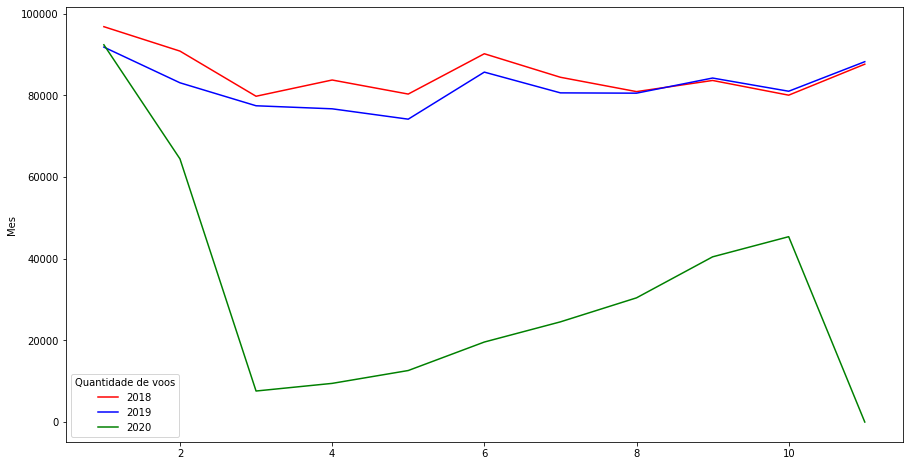

In [173]:
ax = sns.lineplot(x=mes, y=qtde_2018, color="red", label="2018")
ax = sns.lineplot(x=mes, y=qtde_2019, color="blue", label="2019")
ax = sns.lineplot(x=mes, y=qtde_2020, color="green", label="2020")
plt.legend(title="Quantidade de voos")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



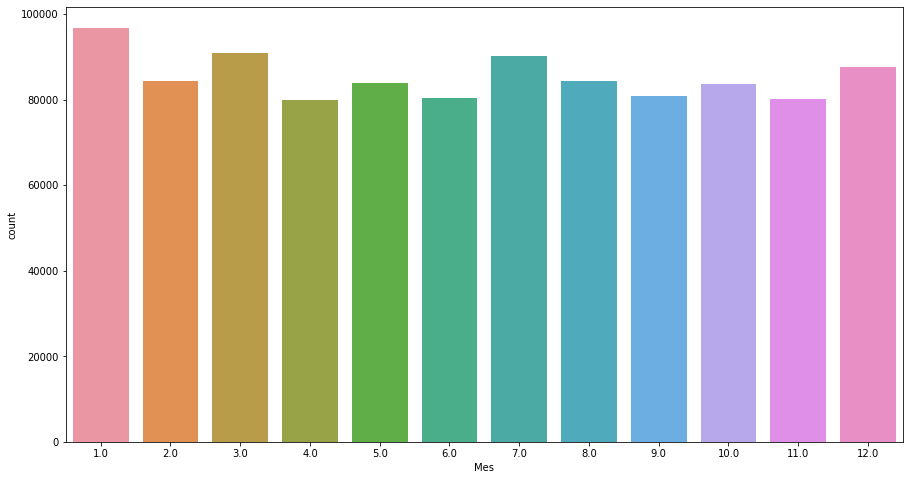

In [178]:
sns.countplot(ano_2018.Mes)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



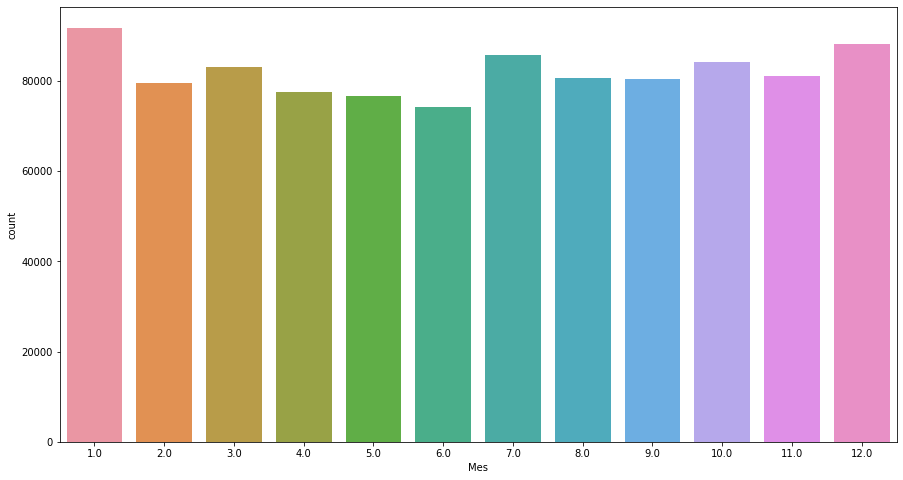

In [176]:
sns.countplot(ano_2019.Mes)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

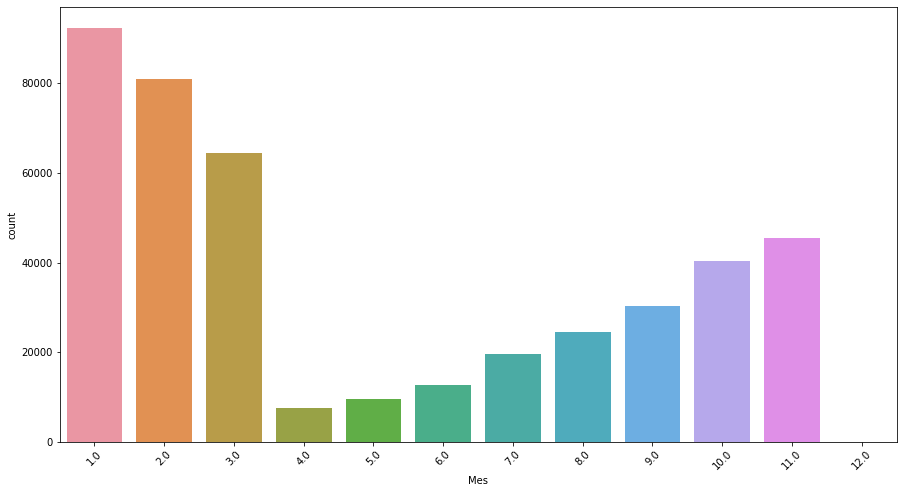

In [183]:
sns.countplot(ano_2020.Mes)
plt.xticks(rotation=45)